Давыдов ПИм-231 лаба 7 ммо

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def plot_morphological_operations(img, kernel, operation, iterations_range):
    for iterations in iterations_range:
        if operation == 'dilate':
            morph_img = cv2.dilate(img, kernel, iterations=iterations)
            title = f'Dilated (Iterations={iterations})'
        elif operation == 'erode':
            morph_img = cv2.erode(img, kernel, iterations=iterations)
            title = f'Eroded (Iterations={iterations})'
        else:
            raise ValueError("Invalid operation! Use 'dilate' or 'erode'.")

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title('Original')
        plt.subplot(1, 2, 2)
        plt.imshow(morph_img, cmap='gray')
        plt.title(title)
        plt.show()


In [ ]:
img = cv2.imread('Morph.jpg', 0)

kernels = [
    cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)),
    cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)),
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)),
    cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5)),
    cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)),
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
]

Откройте изображение Morph.jpg. Примените к нему базовые
морфологические операции (дилатацию и эрозию) с структурными
элементами крест, прямоугольник и эллипс (для каждого из них попробуйте
размеры 3x3 и 5х5) и с 1, 3 , 5 итерациями.

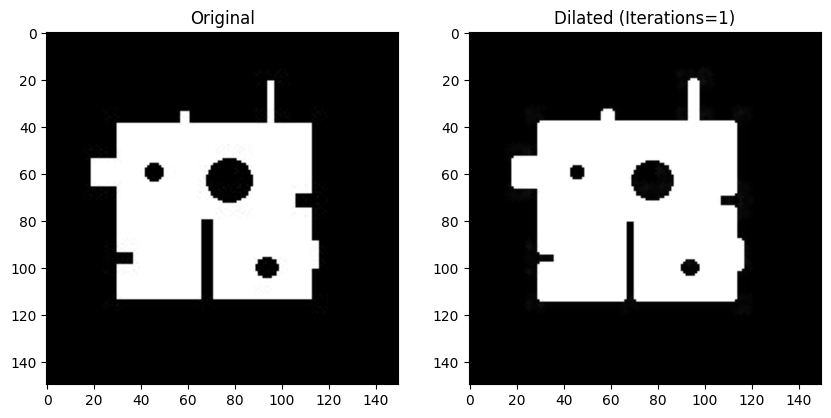

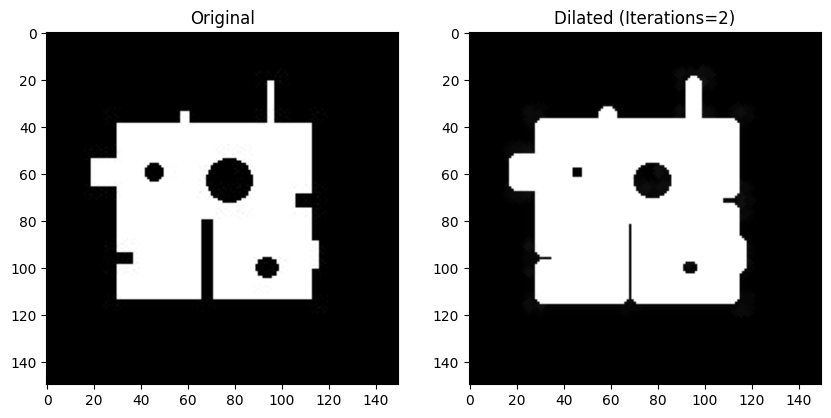

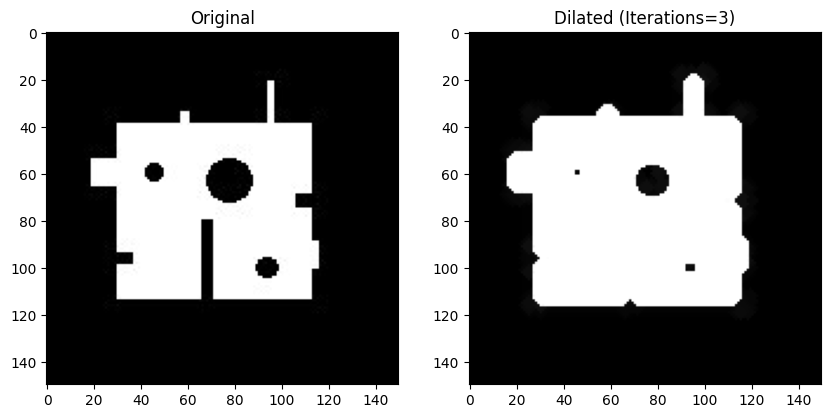

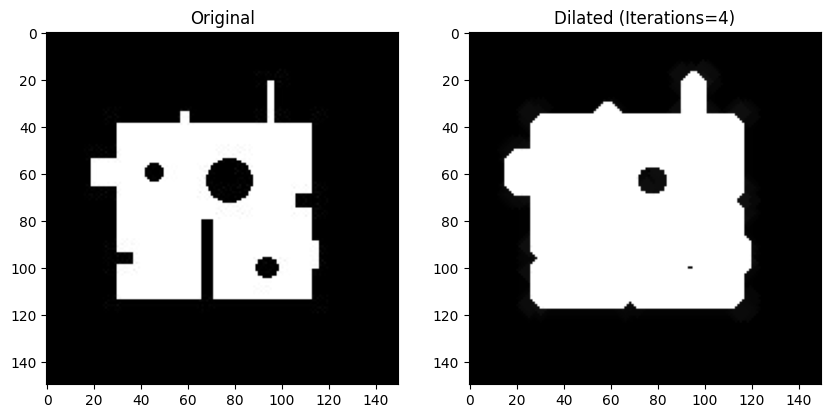

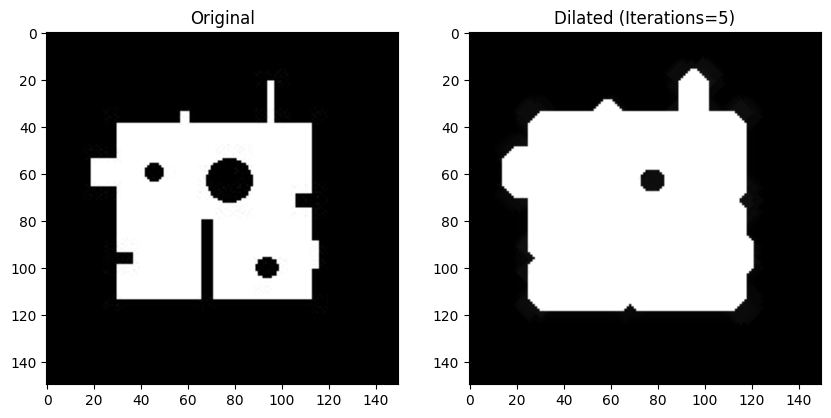

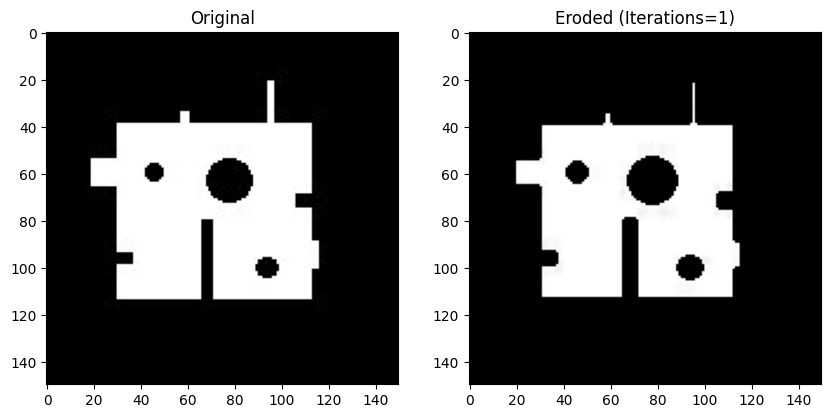

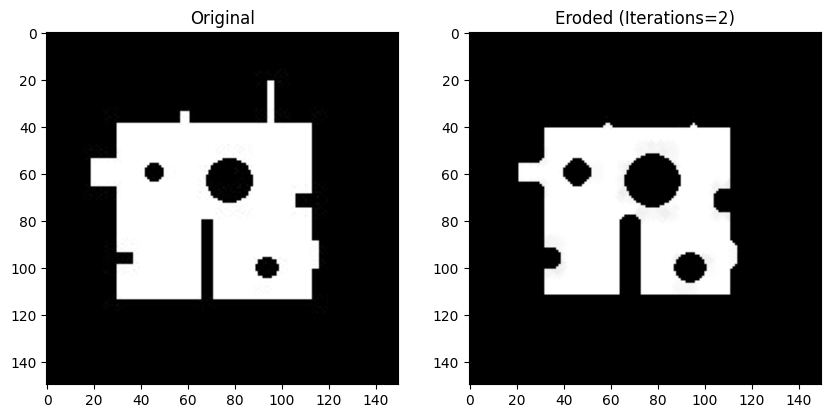

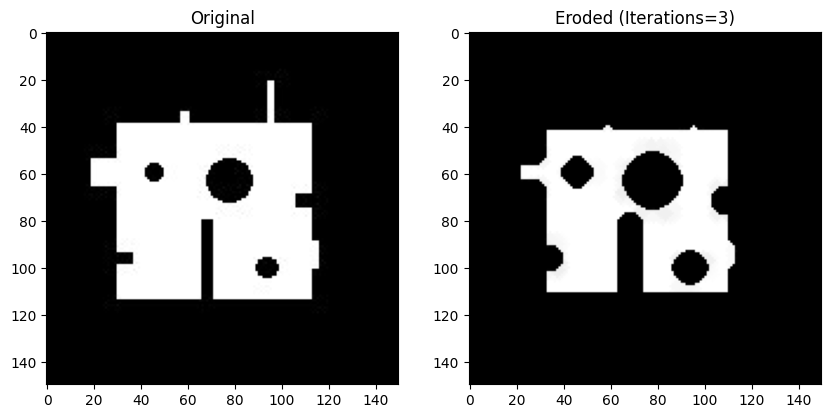

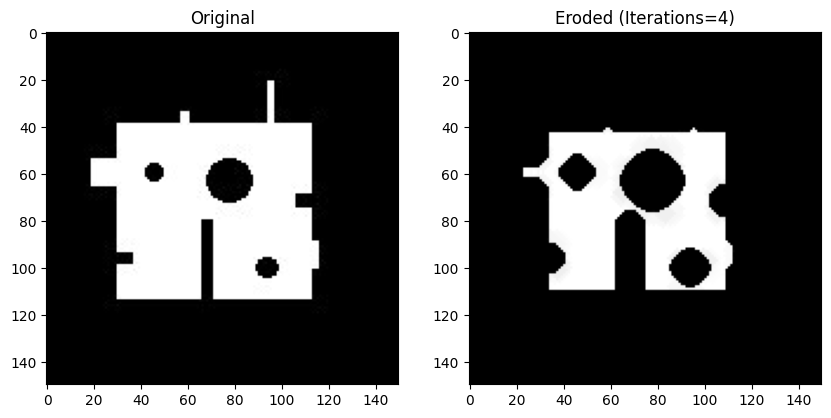

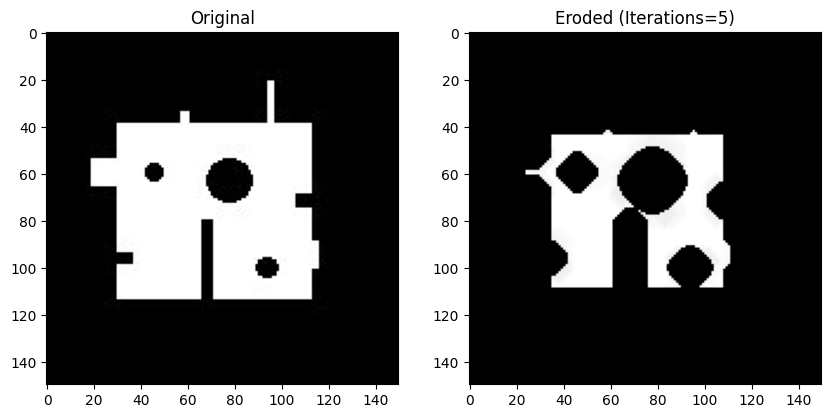

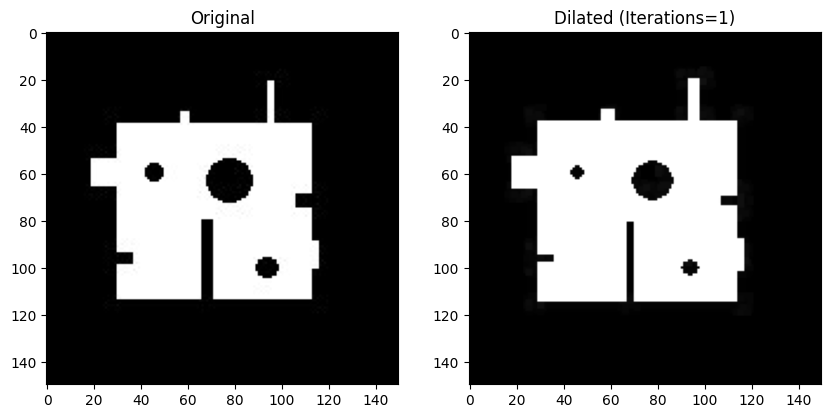

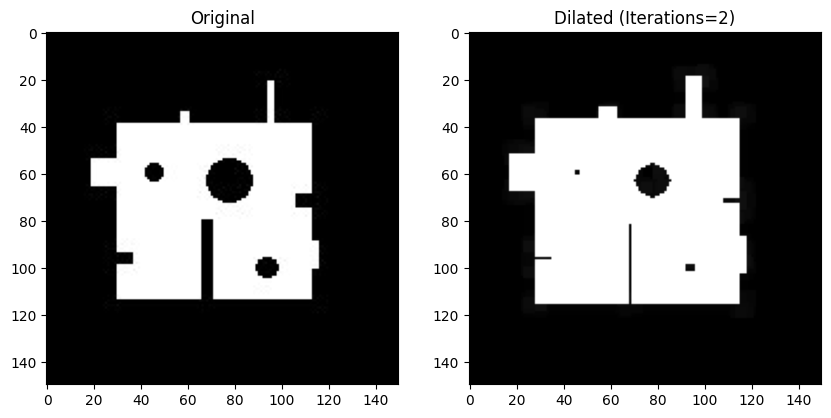

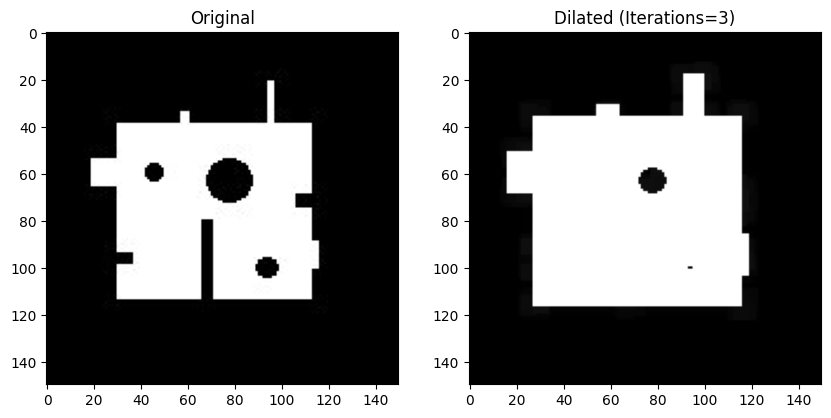

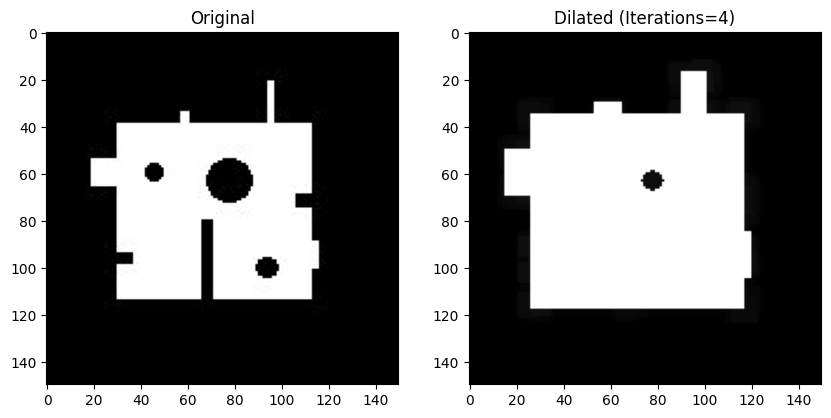

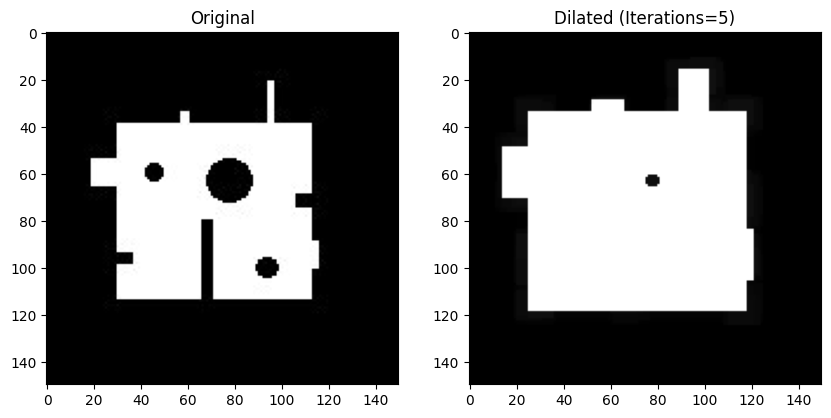

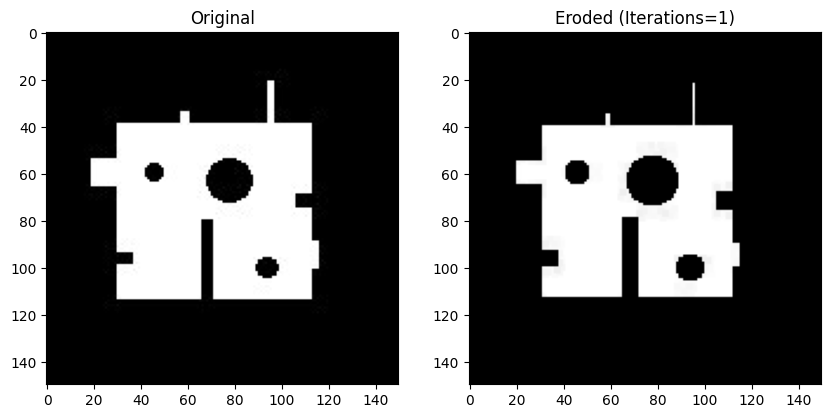

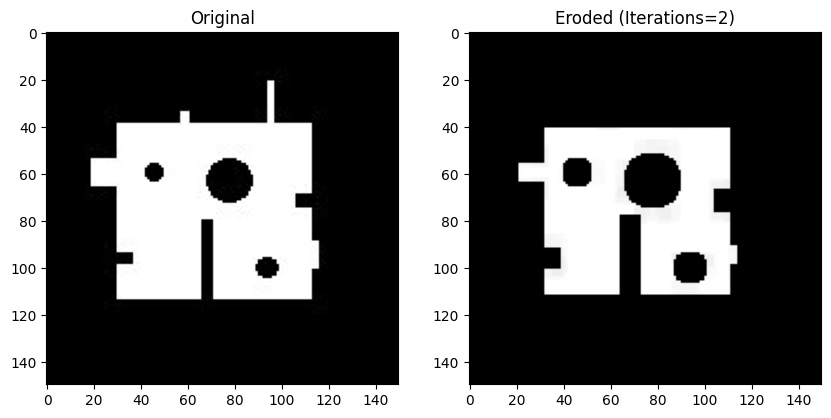

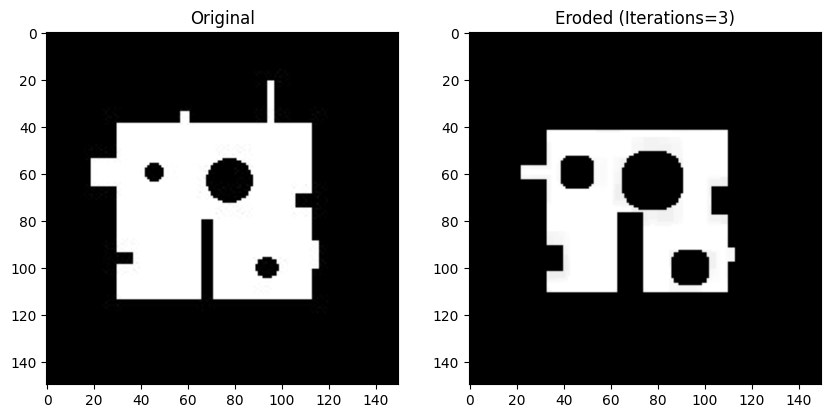

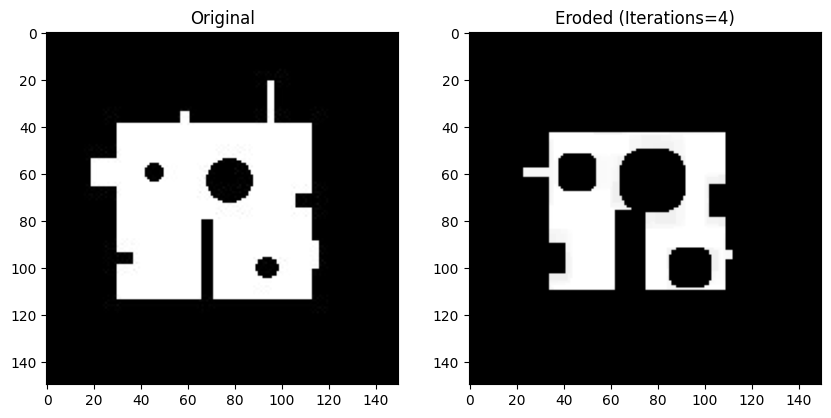

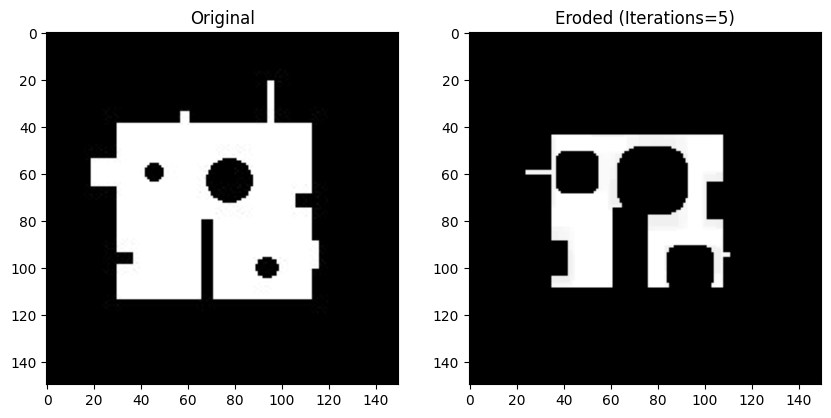

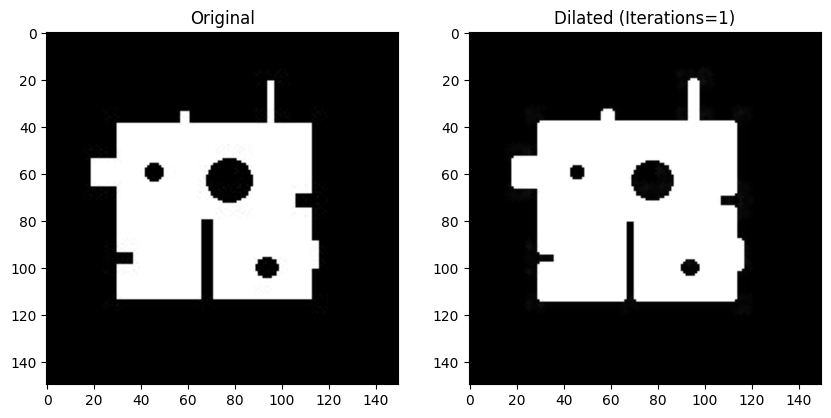

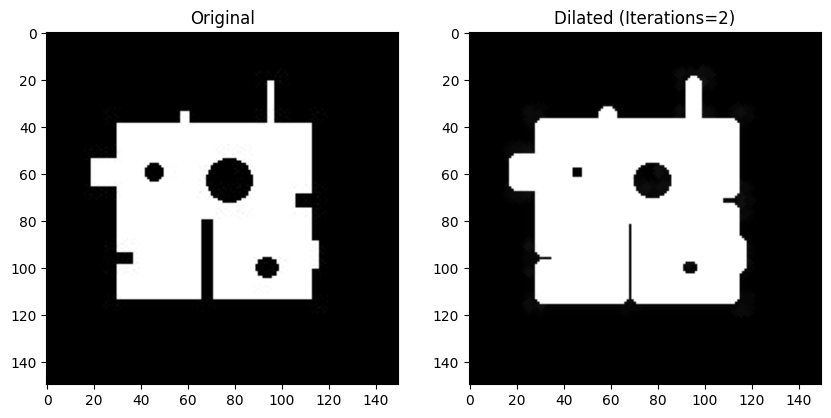

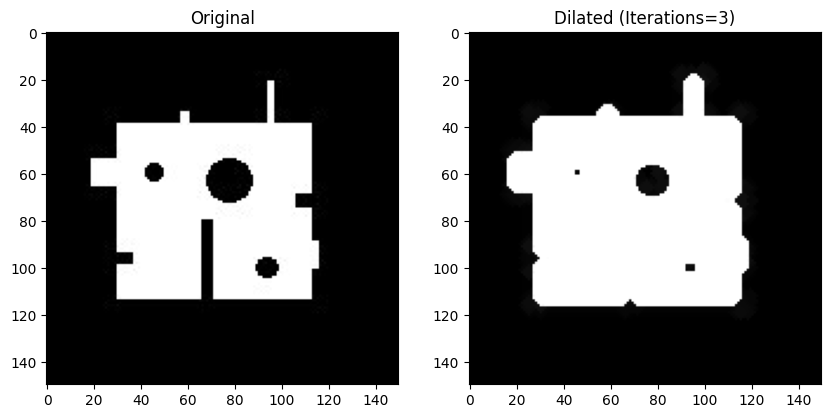

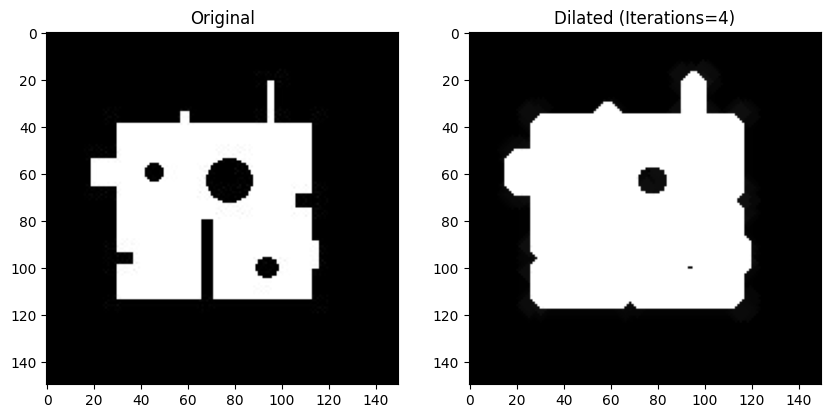

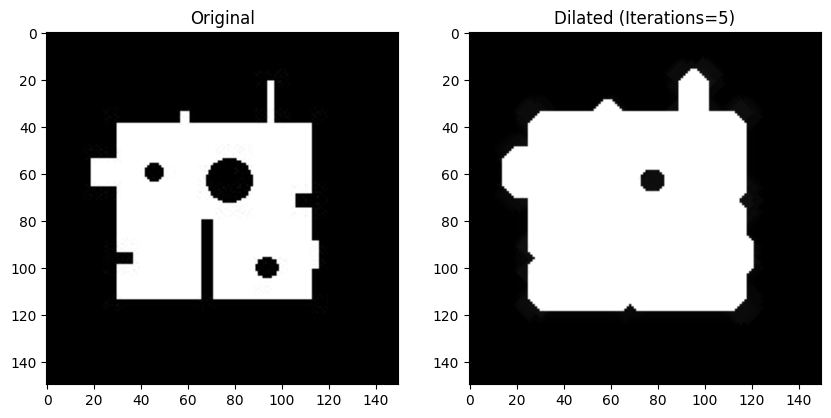

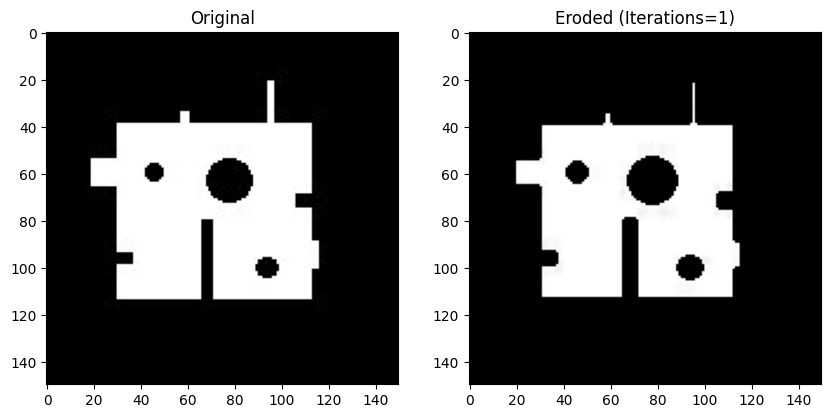

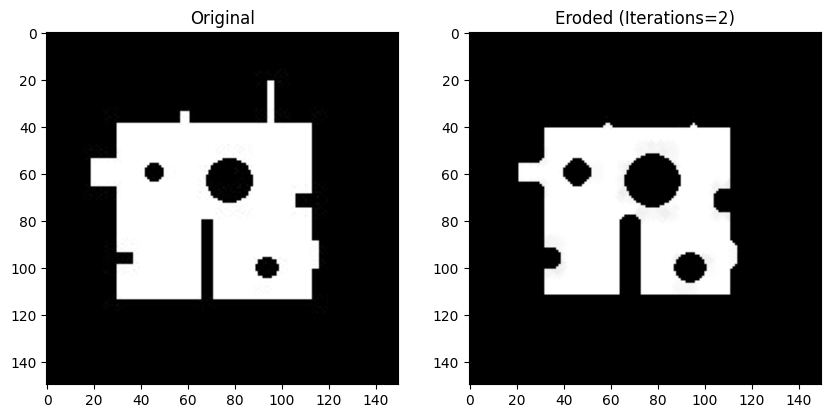

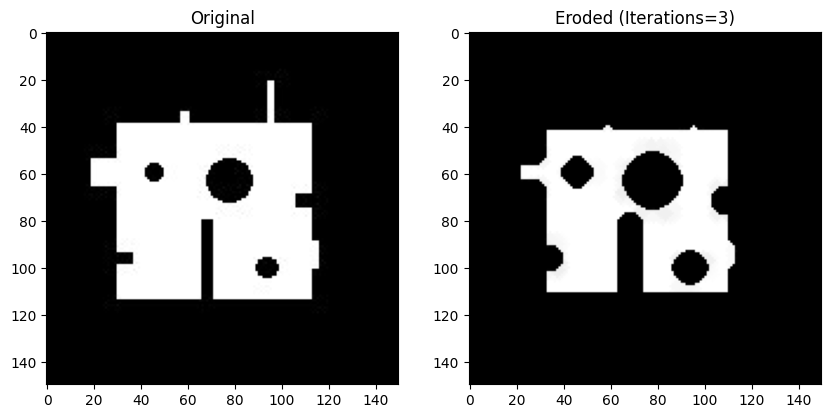

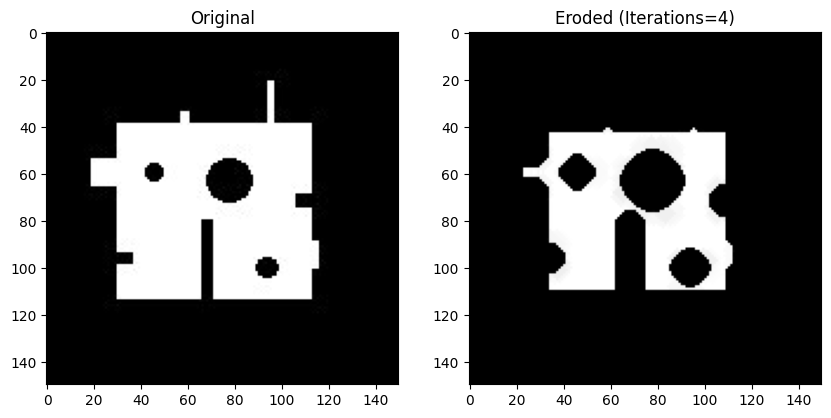

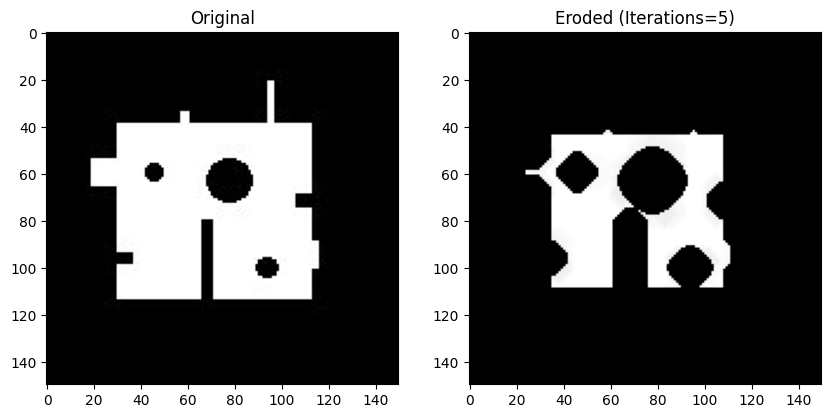

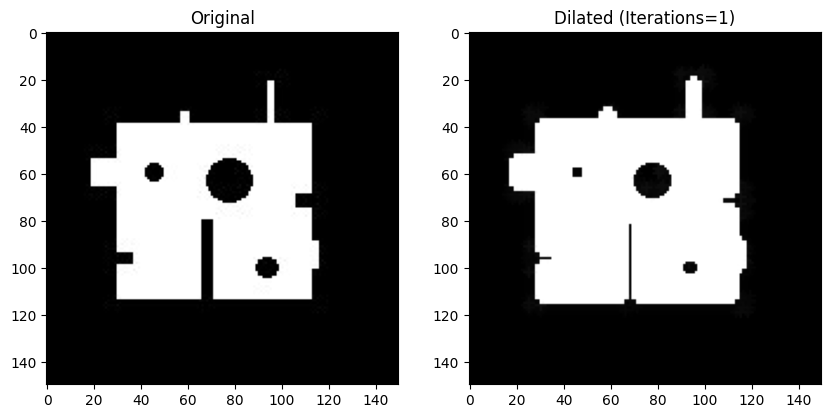

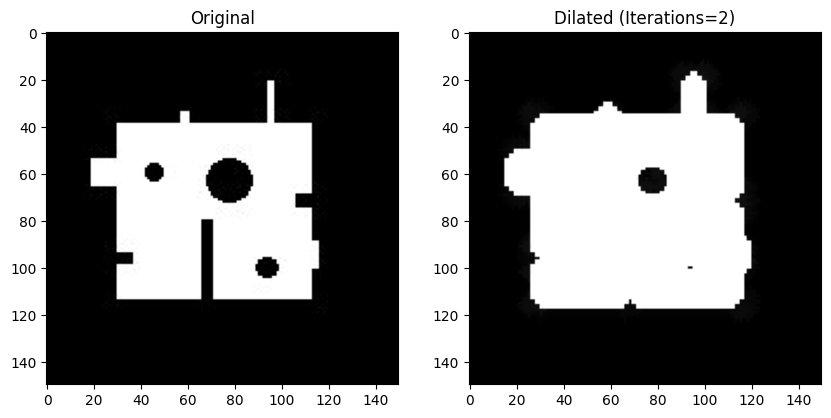

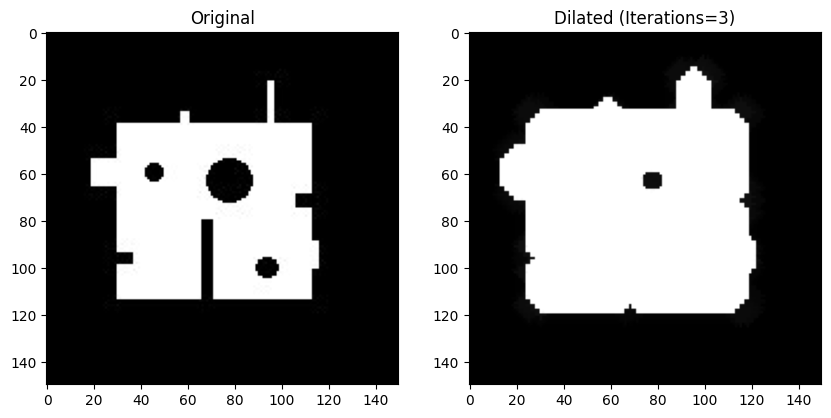

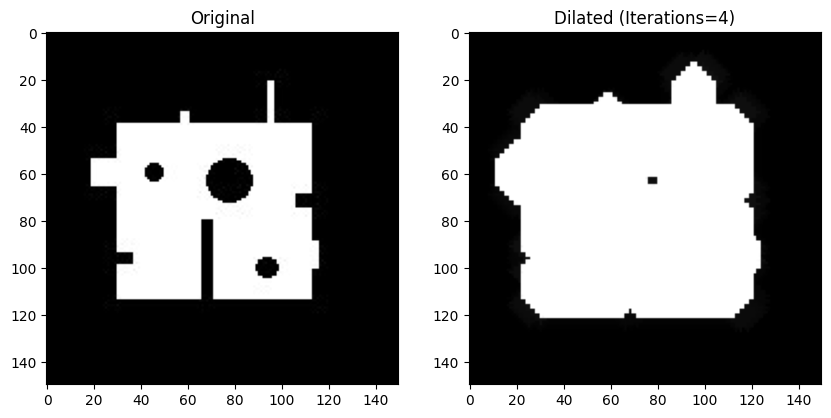

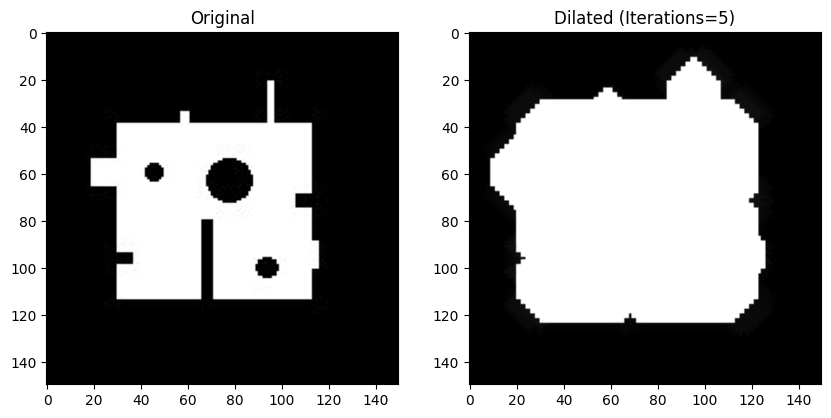

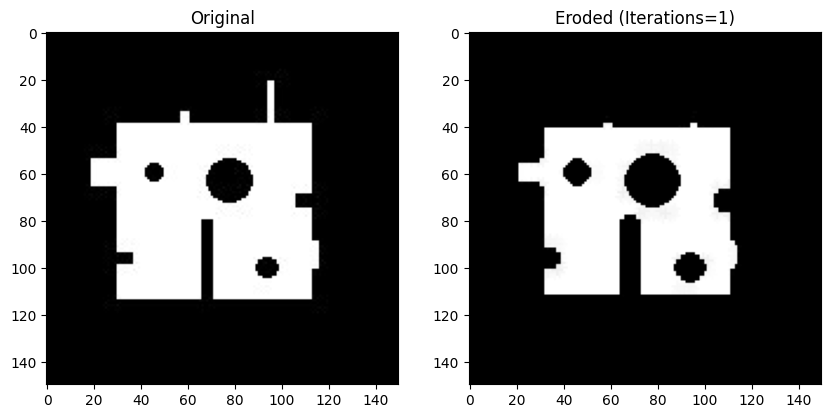

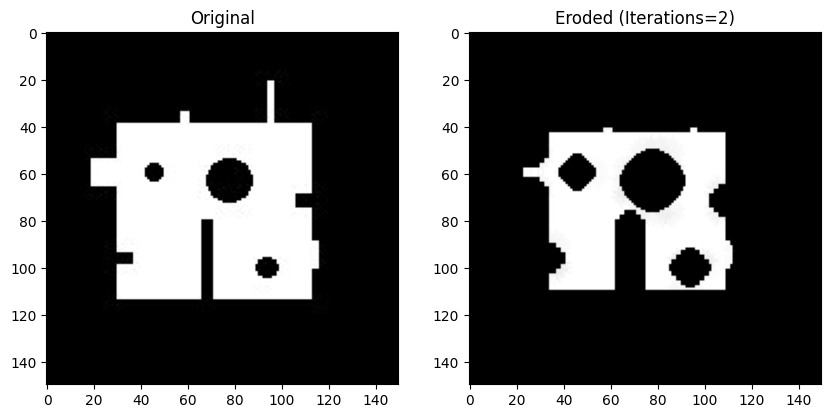

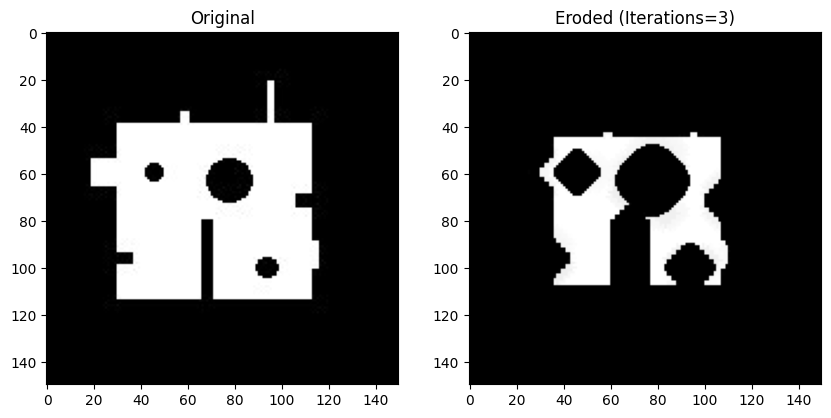

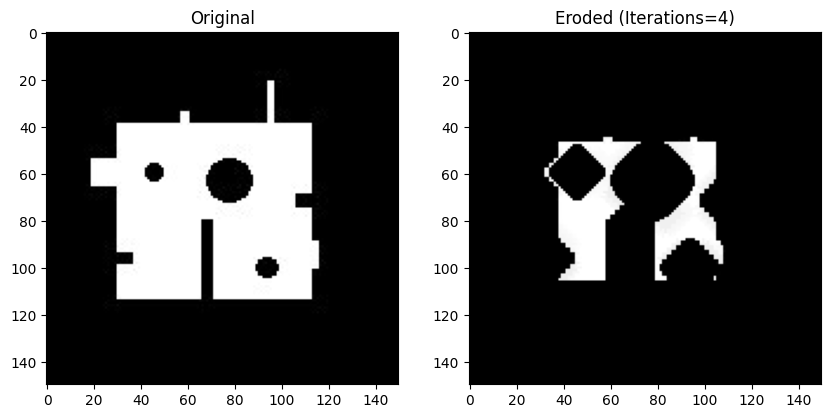

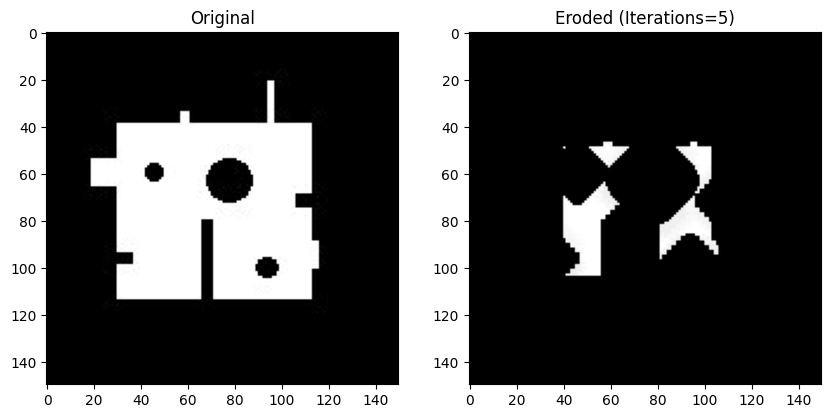

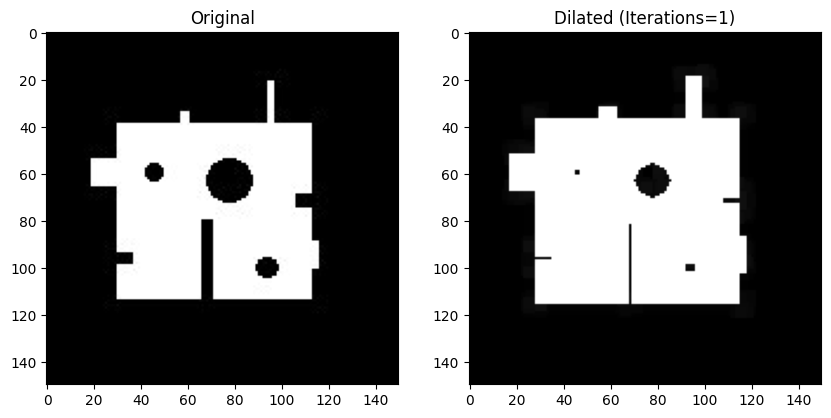

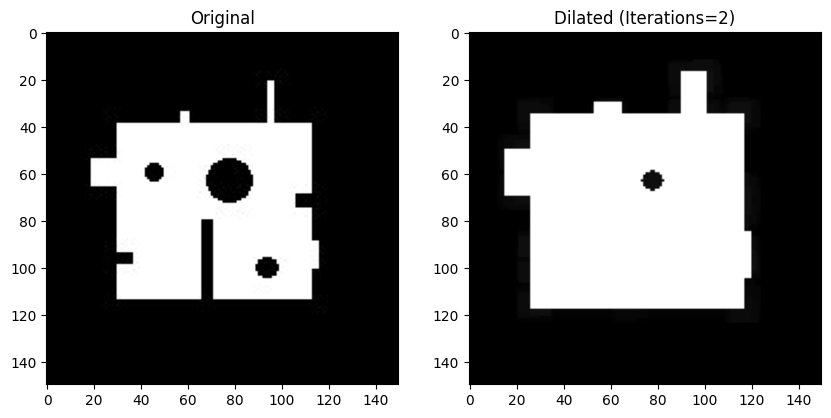

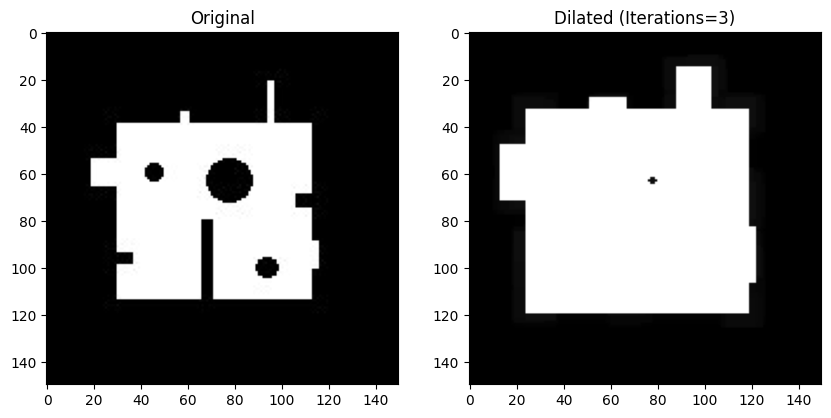

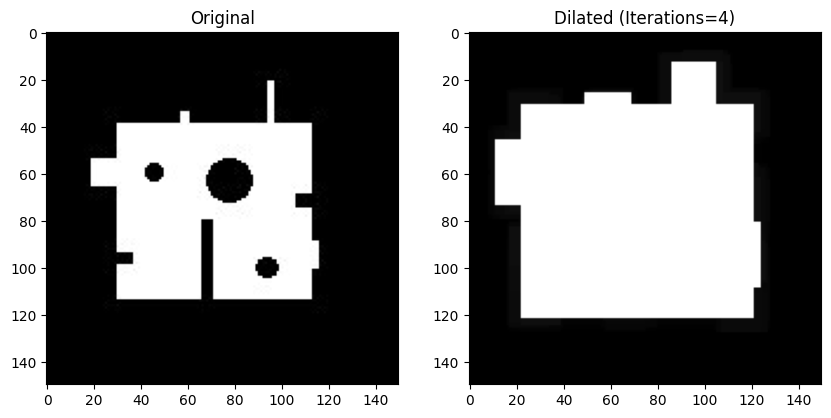

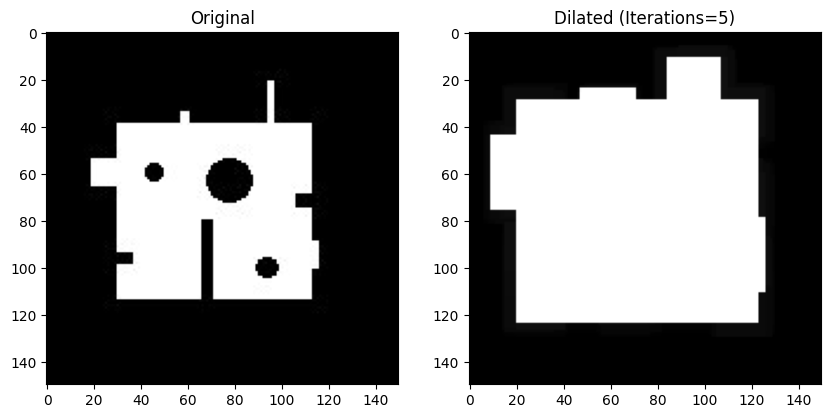

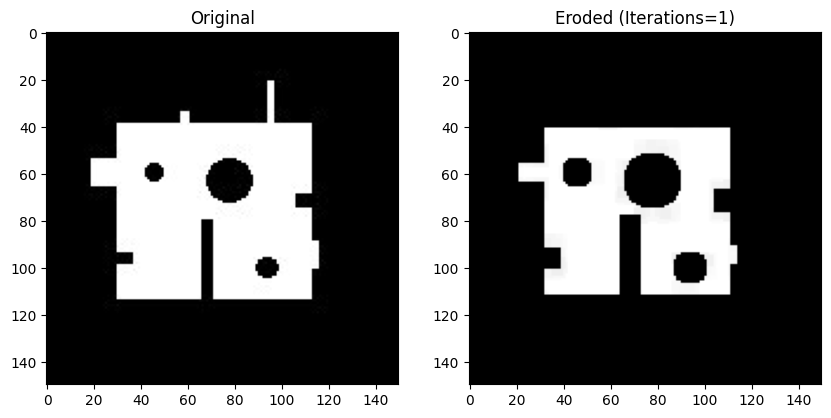

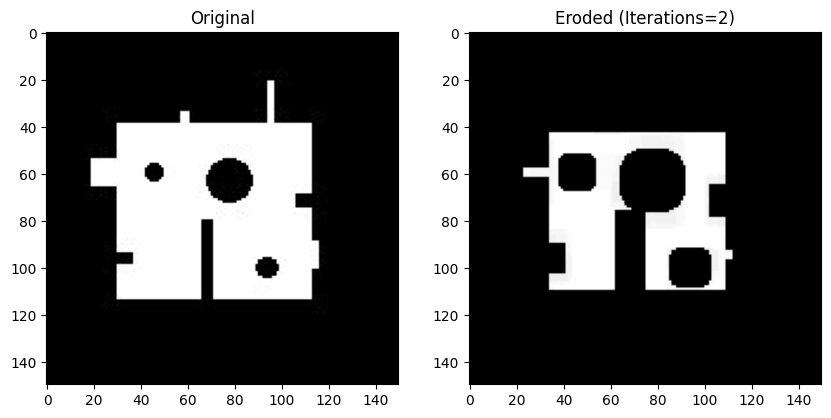

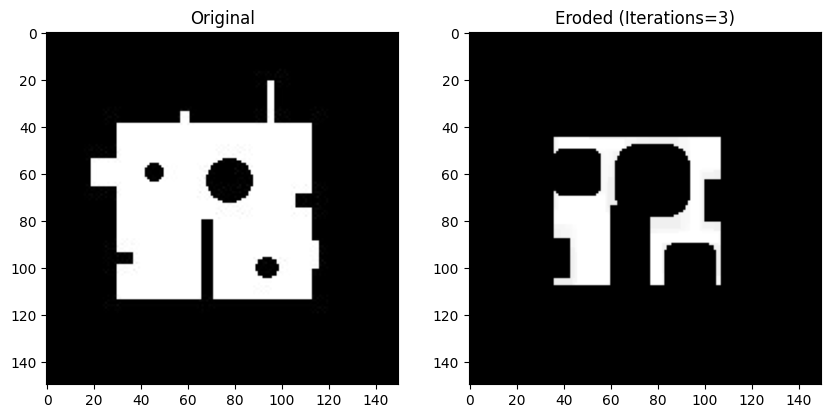

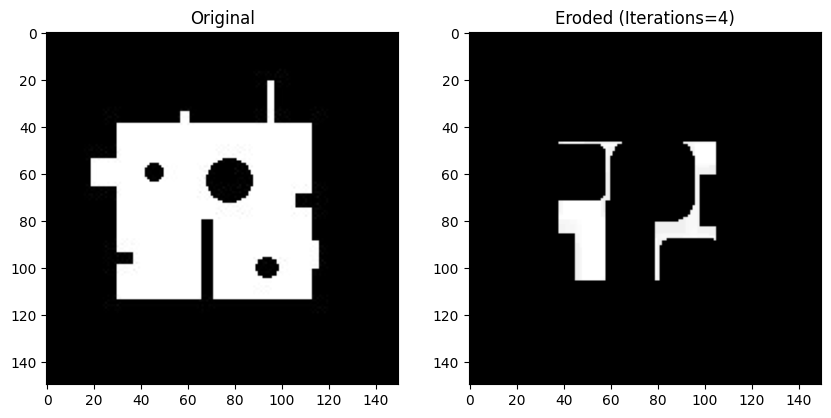

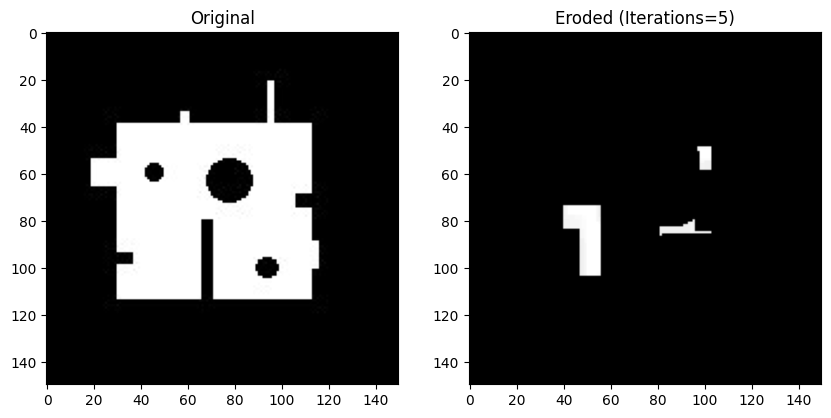

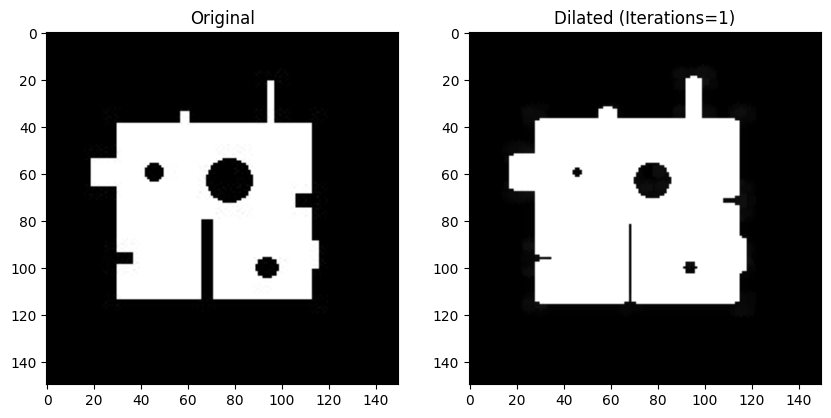

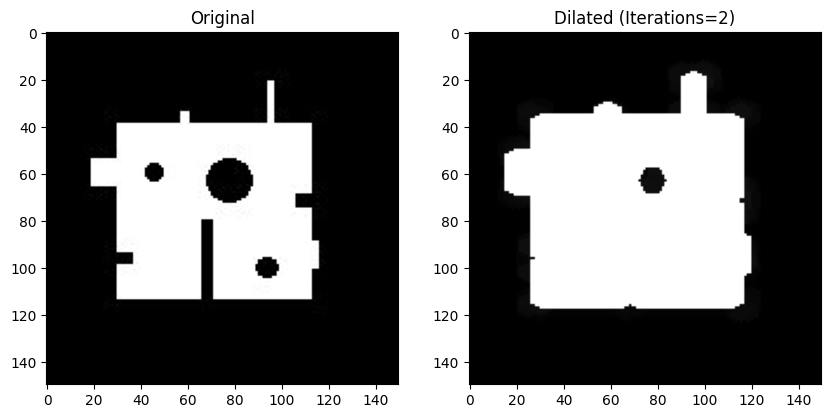

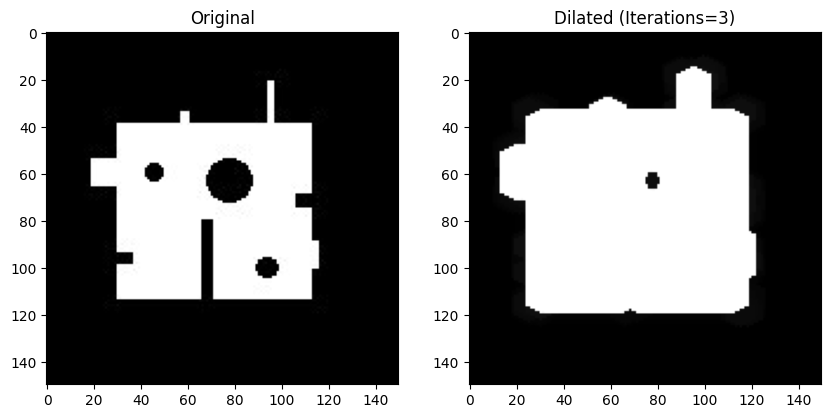

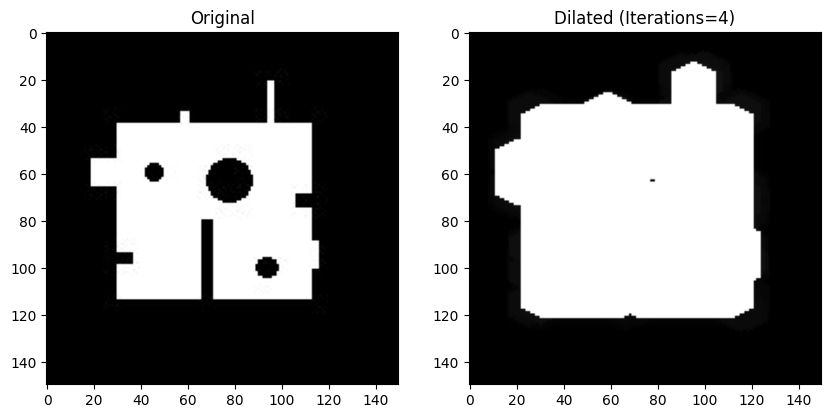

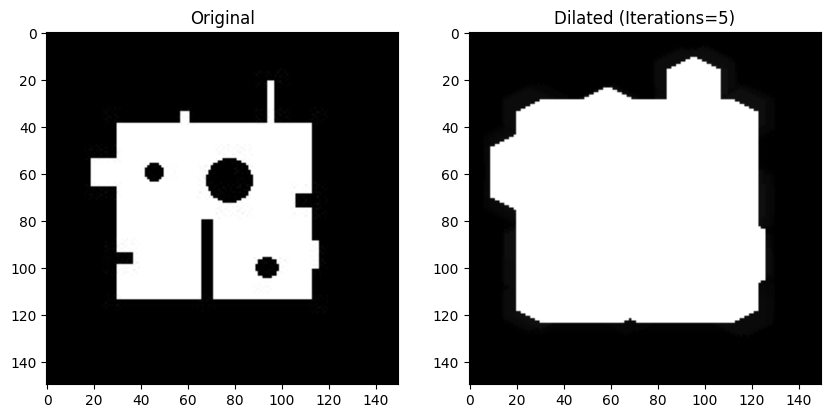

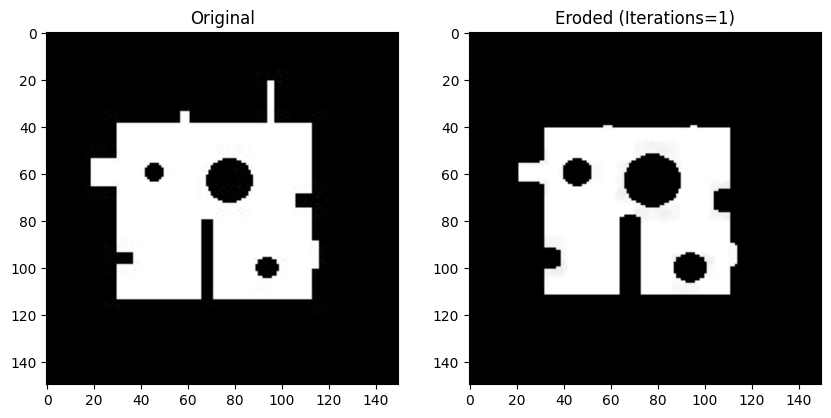

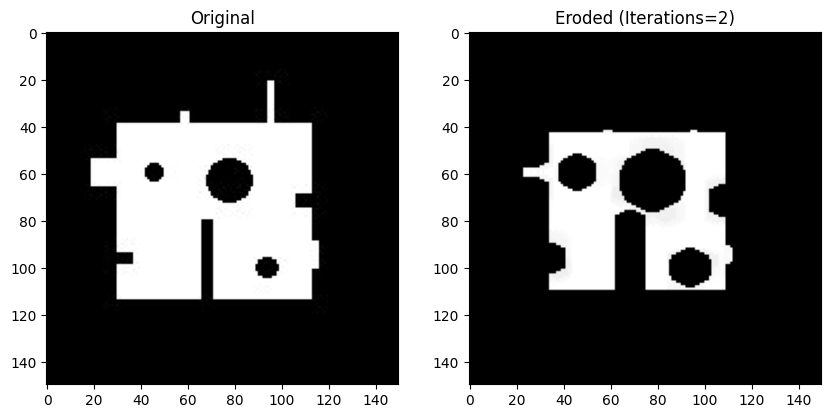

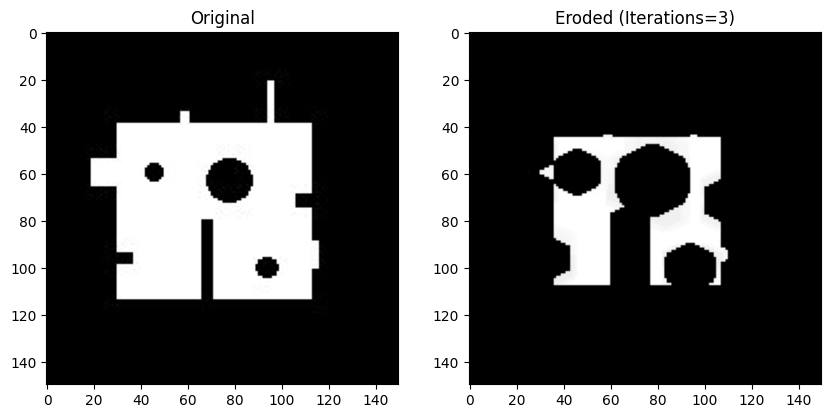

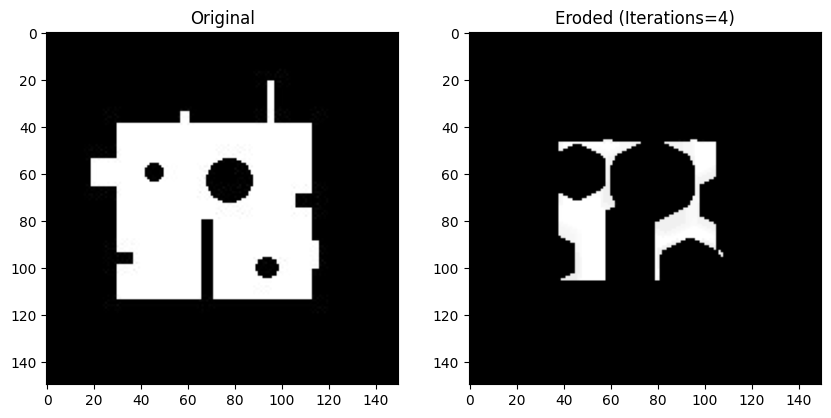

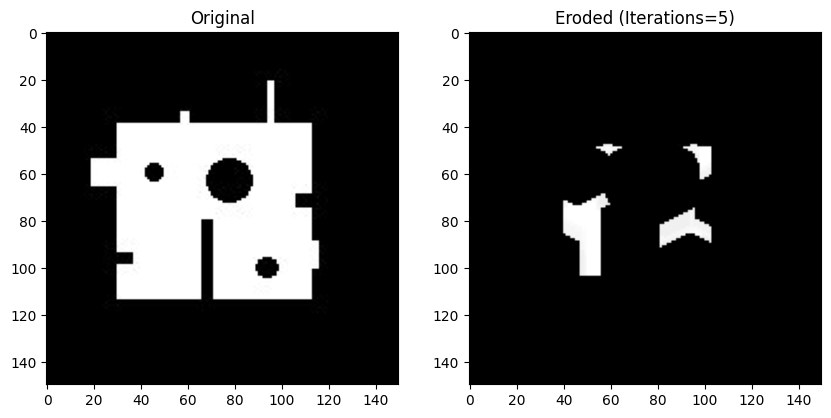

In [ ]:
for kernel in kernels:
    plot_morphological_operations(img, kernel, 'dilate', range(1, 6))
    plot_morphological_operations(img, kernel, 'erode', range(1, 6))

Контуры:

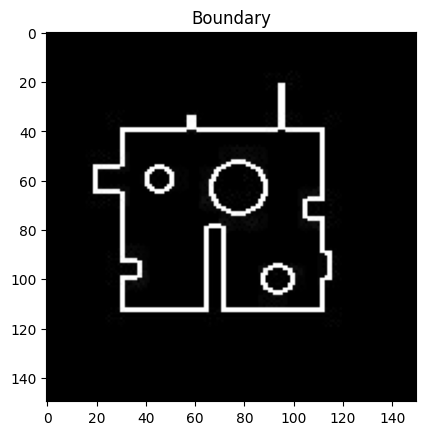

In [ ]:
boundary_img = img - cv2.erode(img, kernel)
plt.imshow(boundary_img, cmap='gray')
plt.title('Boundary')
plt.show()

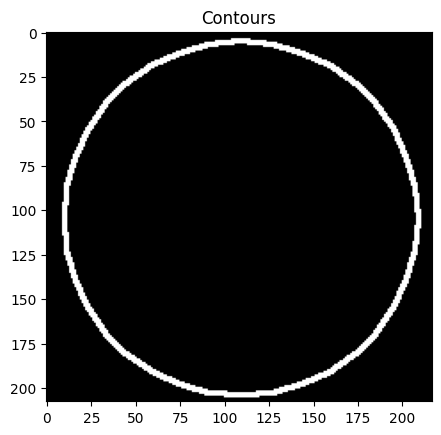

In [ ]:
img3 = cv2.imread('/content/morph3.bmp', cv2.IMREAD_GRAYSCALE)
ret, thresh_img = cv2.threshold(img3, 127, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = cv2.drawContours(np.zeros_like(img3), contours, -1, (255, 255, 255), 2)
plt.imshow(contour_img, cmap='gray')
plt.title('Contours')
plt.show()
